In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
from datetime import datetime
import requests

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
coordinates

[(-12.152751614708151, -43.25388139943729),
 (-77.78762052552293, -9.926780948941115),
 (75.62639711992841, 99.76944326960438),
 (14.120028131039291, -49.722109565467946),
 (61.94067146606585, -106.88097966703234),
 (66.75361996239317, 26.35141365057555),
 (65.72806075337402, 106.43219626232263),
 (-58.610335384749746, -83.4263344892695),
 (-23.692777163532142, 18.0002934631799),
 (-14.681222960847762, 141.4989261401363),
 (63.39503847589856, 177.72748027616427),
 (-35.236394501466854, 94.13378367616036),
 (33.52217112625665, -93.49643594147341),
 (-5.050032633268373, -119.72101025202002),
 (-80.21174744404176, 44.69974608831788),
 (69.48407315777354, 20.93227605229174),
 (64.36399474210864, -99.23980132907691),
 (-15.611474661631647, 41.25619262248682),
 (-33.41718507249265, -166.92005664978458),
 (34.94383819766962, 103.58650052572813),
 (-6.933667494446553, -26.224577525633464),
 (60.64938203453971, -48.02868388670049),
 (-73.80899569921252, -71.45499566694578),
 (78.53901124933694,

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


628

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ibotirama
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | cape town
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | khatanga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | sinnamary
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | la ronge
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | rovaniemi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | yerbogachen
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 2 | longyearbyen
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | yellowknife
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | hoi an
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | nikolskoye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | bodden town
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | santiago del estero
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | verkhoyansk
-----------------------------
Data Retrieval Complete      

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 3 | tura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 3 | andreapol
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | vanimo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | kyra
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | qaanaaq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | athabasca
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | provideniya
-----------------------------
Data Retrieval Complete      
-----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 4 | kitgum
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 4 | vostok
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | seydi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | dingzhou
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | sao filipe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | mizan teferi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | talara
-----------------------------
Data Retrieval Complete      
--------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 5 | haines junction
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 5 | cervo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 5 | faanui
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 5 | abha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | lolua
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | tumannyy
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | codrington
-----------------------------
Da

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 7 | saint-georges
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 7 | samandag
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 7 | salta
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 7 | chara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 7 | iracoubo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | geraldton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | namatanai
-----------------------------
Data Retrieval Complete      
-------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 8 | bantry
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 8 | qasigiannguit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 8 | alyangula
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 8 | biak
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 8 | marivan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | saint george
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | lompoc
-----------------------------
Data Retrieval Complete      
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 9 | praia da vitoria
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 9 | lander
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 9 | pindwara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 9 | nioro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 9 | kamenskoye
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | sentyabrskiy
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | awash
---------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 10 | kondinskoye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 10 | lata
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 10 | torbay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 10 | jalu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 10 | agadir
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | mlonggo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | kutum
-----------------------------
Data Retrieval Complete      
-----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 12 | ehingen
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 12 | eirunepe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 12 | tomislavgrad
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 12 | tazovskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 12 | marathon
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12 | beroroha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | chattanooga
-----------------------------
Data Retrieval Complete      
---------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 13 | manzhouli
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 13 | peleduy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 13 | safwah
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 13 | panguna
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 13 | tilichiki
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 13 | palu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 13 | san carlos de bariloche
-----------------------------
Data Retr

In [12]:
len(city_data)

571

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ibotirama,-12.19,-43.22,78.75,28,12,0.76,BR,2020-08-20 22:00:53
1,Cape Town,-33.93,18.42,55.99,100,4,1.12,ZA,2020-08-20 22:02:06
2,Khatanga,71.97,102.50,43.07,68,0,12.84,RU,2020-08-20 22:02:07
3,Sinnamary,5.38,-52.95,80.64,81,4,14.41,GF,2020-08-20 22:02:07
4,La Ronge,55.10,-105.28,77.00,41,20,5.82,CA,2020-08-20 22:02:07
5,Rovaniemi,66.50,25.72,60.80,93,20,9.17,FI,2020-08-20 21:57:16
6,Yerbogachen,61.28,108.01,52.97,95,14,6.91,RU,2020-08-20 22:02:08
7,Punta Arenas,-53.15,-70.92,44.60,75,40,23.04,CL,2020-08-20 22:00:25
8,Mariental,-24.63,17.97,48.42,35,0,11.52,NA,2020-08-20 22:02:08
9,Mareeba,-17.00,145.43,66.20,88,0,1.36,AU,2020-08-20 22:02:08


In [14]:
city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ibotirama,BR,2020-08-20 22:00:53,-12.19,-43.22,78.75,28,12,0.76
1,Cape Town,ZA,2020-08-20 22:02:06,-33.93,18.42,55.99,100,4,1.12
2,Khatanga,RU,2020-08-20 22:02:07,71.97,102.50,43.07,68,0,12.84
3,Sinnamary,GF,2020-08-20 22:02:07,5.38,-52.95,80.64,81,4,14.41
4,La Ronge,CA,2020-08-20 22:02:07,55.10,-105.28,77.00,41,20,5.82
...,...,...,...,...,...,...,...,...,...
566,Yumen,CN,2020-08-20 22:04:30,40.28,97.20,67.44,50,99,10.71
567,Nantucket,US,2020-08-20 22:04:30,41.28,-70.10,69.80,73,1,9.17
568,Lalmohan,BD,2020-08-20 22:04:30,22.34,90.74,82.09,84,100,17.29
569,Providencia,MX,2020-08-20 22:04:30,28.72,-111.58,96.01,57,51,15.01


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597961071.247433

In [18]:
today=time.strftime("%x")
today

'08/20/20'

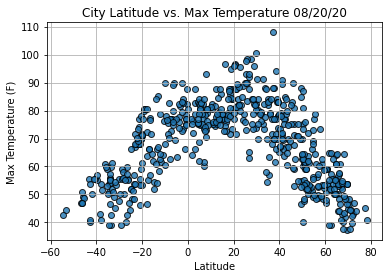

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

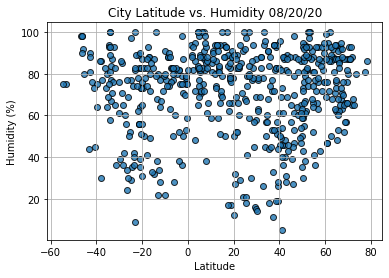

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

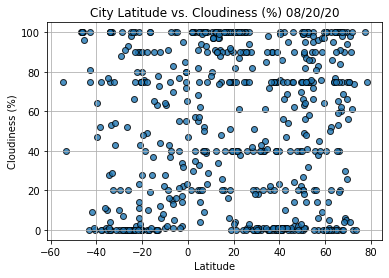

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

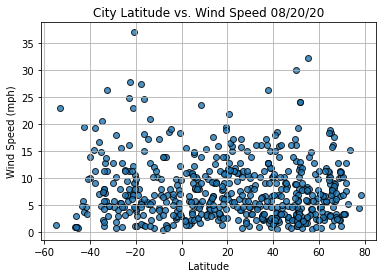

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
from scipy.stats import linregress

In [24]:
import matplotlib.pyplot as plt

In [26]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                       Atuona
Lat                          -9.8
Lng                       -139.03
Max Temp                     78.1
Humidity                       77
Cloudiness                     63
Wind Speed                  17.31
Country                        PF
Date          2020-08-20 22:02:09
Name: 13, dtype: object

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Khatanga,71.97,102.50,43.07,68,0,12.84,RU,2020-08-20 22:02:07
3,Sinnamary,5.38,-52.95,80.64,81,4,14.41,GF,2020-08-20 22:02:07
4,La Ronge,55.10,-105.28,77.00,41,20,5.82,CA,2020-08-20 22:02:07
5,Rovaniemi,66.50,25.72,60.80,93,20,9.17,FI,2020-08-20 21:57:16
6,Yerbogachen,61.28,108.01,52.97,95,14,6.91,RU,2020-08-20 22:02:08
...,...,...,...,...,...,...,...,...,...
566,Yumen,40.28,97.20,67.44,50,99,10.71,CN,2020-08-20 22:04:30
567,Nantucket,41.28,-70.10,69.80,73,1,9.17,US,2020-08-20 22:04:30
568,Lalmohan,22.34,90.74,82.09,84,100,17.29,BD,2020-08-20 22:04:30
569,Providencia,28.72,-111.58,96.01,57,51,15.01,MX,2020-08-20 22:04:30


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

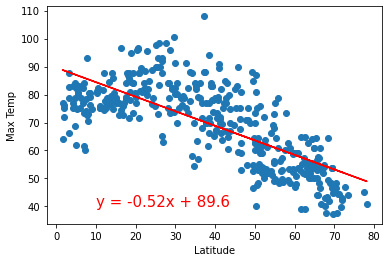

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

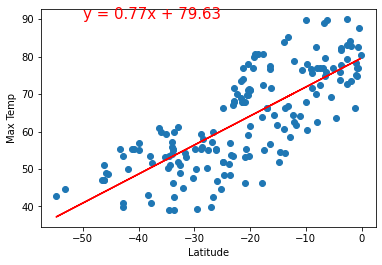

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

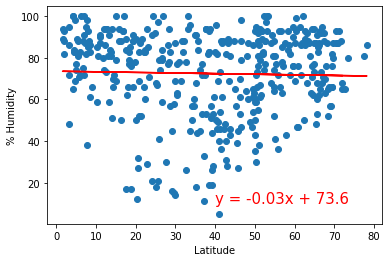

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

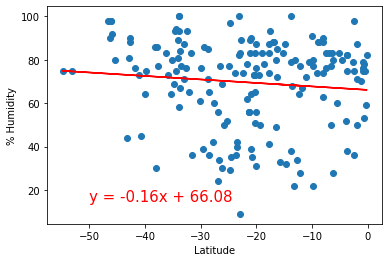

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

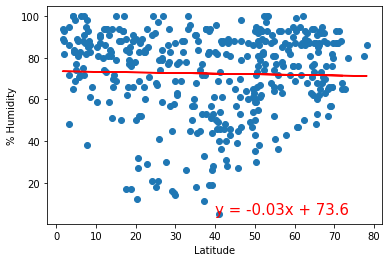

In [34]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,5))

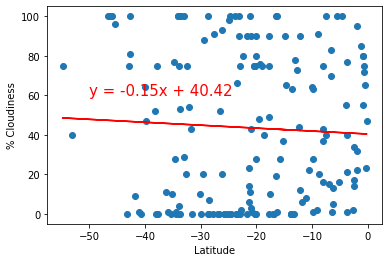

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

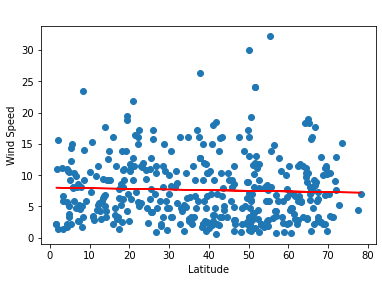

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

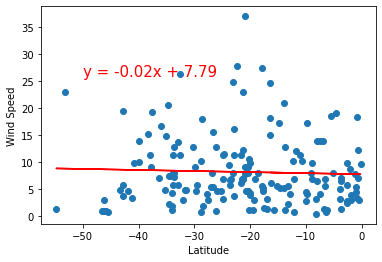

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,26))

In [38]:
linregress(x_values,y_values)

LinregressResult(slope=-0.019578549299041396, intercept=7.7902903385520075, rvalue=-0.03960912935044582, pvalue=0.6048748549248988, stderr=0.037769932731915146)

In [55]:
from scipy.stats import linregress
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ibotirama,-12.19,-43.22,78.75,28,12,0.76,BR,2020-08-20 22:00:53
1,Cape Town,-33.93,18.42,55.99,100,4,1.12,ZA,2020-08-20 22:02:06
2,Khatanga,71.97,102.50,43.07,68,0,12.84,RU,2020-08-20 22:02:07
3,Sinnamary,5.38,-52.95,80.64,81,4,14.41,GF,2020-08-20 22:02:07
4,La Ronge,55.10,-105.28,77.00,41,20,5.82,CA,2020-08-20 22:02:07
...,...,...,...,...,...,...,...,...,...
566,Yumen,40.28,97.20,67.44,50,99,10.71,CN,2020-08-20 22:04:30
567,Nantucket,41.28,-70.10,69.80,73,1,9.17,US,2020-08-20 22:04:30
568,Lalmohan,22.34,90.74,82.09,84,100,17.29,BD,2020-08-20 22:04:30
569,Providencia,28.72,-111.58,96.01,57,51,15.01,MX,2020-08-20 22:04:30


In [52]:
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
western_hemi_df = city_data_df[city_data_df['Lng']>=0]
eastern_hemi_df = city_data_df[city_data_df['Lng']<0]

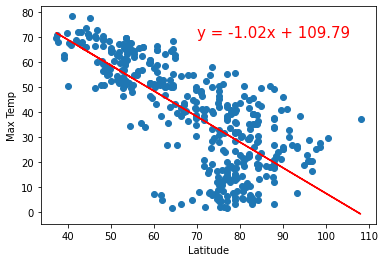

In [61]:
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df['Lat']
plot_linear_regression(x_values, y_values, 'Title','Max Temp', (70,70))

LinregressResult(slope=-2.2901530723758743, intercept=174.16593845331232, rvalue=-0.37544751135886056, pvalue=9.045283107841101e-15, stderr=0.28410192139887114)

In [62]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ibotirama,-12.19,-43.22,78.75,28,12,0.76,BR,2020-08-20 22:00:53
1,Cape Town,-33.93,18.42,55.99,100,4,1.12,ZA,2020-08-20 22:02:06
2,Khatanga,71.97,102.50,43.07,68,0,12.84,RU,2020-08-20 22:02:07
3,Sinnamary,5.38,-52.95,80.64,81,4,14.41,GF,2020-08-20 22:02:07
4,La Ronge,55.10,-105.28,77.00,41,20,5.82,CA,2020-08-20 22:02:07
...,...,...,...,...,...,...,...,...,...
566,Yumen,40.28,97.20,67.44,50,99,10.71,CN,2020-08-20 22:04:30
567,Nantucket,41.28,-70.10,69.80,73,1,9.17,US,2020-08-20 22:04:30
568,Lalmohan,22.34,90.74,82.09,84,100,17.29,BD,2020-08-20 22:04:30
569,Providencia,28.72,-111.58,96.01,57,51,15.01,MX,2020-08-20 22:04:30


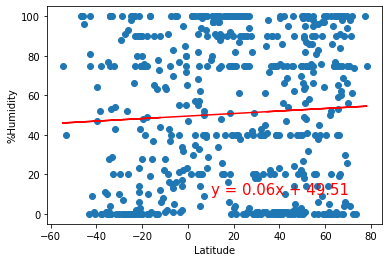

In [65]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plot_linear_regression(x_values,y_values, 'Linear Regression of the Northern hemisphere for Cloudiness', '%Humidity',(10,10))

In [66]:
import seaborn as sns

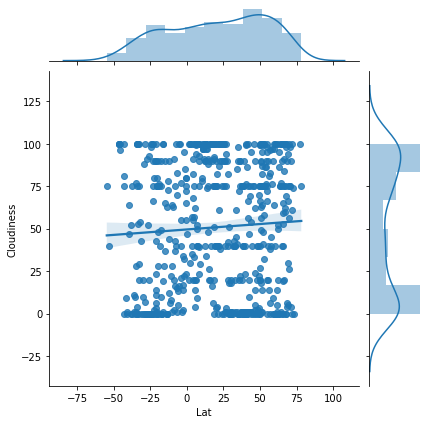

In [70]:
sns.jointplot(x_values, y_values, kind='reg')
